In [1]:
# Importing basic dependencies
#https://www.kaggle.com/datasets/charanpuvvala/company-classification/data
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# let's load the data
path ='classificationdataset.csv'
df = pd.read_csv(path)

In [3]:
#Exploring the data and null values
# have a look at the data
df.head()

,Category,website,company_name,homepage_text,h1,h2,h3,nav_link_text,meta_keywords,meta_description
0,Commercial Services & Supplies,bipelectric.com,bip dipietro electric inc,Electrici...,NaN,NaN,NaN,NaN,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid..."
1,Healthcare,eliasmedical.com,elias medical,site map | en español Elias Medical h...,Offering Bakersfield family medical care from ...,Welcome to ELIAS MEDICAL#sep#Family Medical Pr...,Get To Know Elias Medical#sep#Family Medical P...,NaN,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...
2,Commercial Services & Supplies,koopsoverheaddoors.com,koops overhead doors,Home About Us Garage Door Repair & Servi...,NaN,Customer Reviews#sep#Welcome to Koops Overhead...,NaN,NaN,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,..."
3,Healthcare,midtowneyes.com,midtown eyecare,918-599-0202 Type Size...,NaN,Welcome to our practice!,NaN,NaN,NaN,We would like to welcome you to Midtown Eyecar...
4,Commercial Services & Supplies,reprosecurity.co.uk,repro security ltd,Simply fill out our form below...,NaN,Welcome to REPRO SECURITY Ltd,NaN,NaN,NaN,Repro Security provide a range of tailor made ...


In [4]:
# size of data
df.shape

(73974, 10)

In [6]:
# null value analysis in each column
df.isnull().sum()

Category                0
website                 0
company_name            0
homepage_text         669
h1                  27321
h2                  20762
h3                  29315
nav_link_text       25924
meta_keywords       50302
meta_description     7088
dtype: int64

<Axes: >

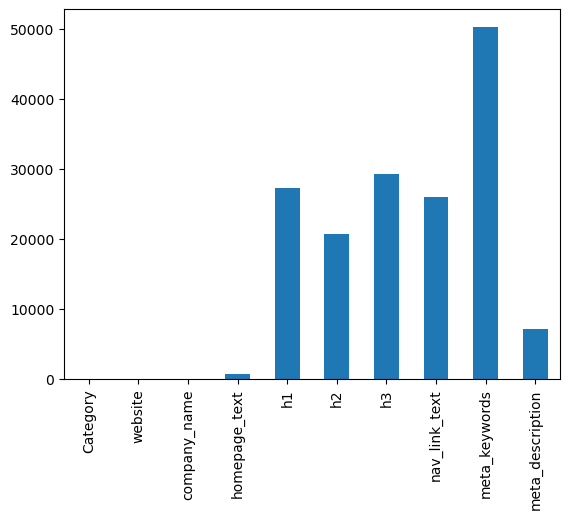

In [7]:
#visualizing the null values per column
df.isnull().sum().plot.bar()

In [8]:
# Three columns category, website and company_name has no null values. Homepage_text also has almost no null values.
# I can make one heading column by combining h1,h2 and h3.
# making a new column by combining h1,h2,h3

df['headings'] = df['h1'].fillna('') + ' ' +df['h2'].fillna('') + ' ' + df['h3'].fillna('')

In [9]:
# dropping indivisual headings columns
df.drop(['h1','h2','h3'], axis=1, inplace=True)

In [10]:
df.columns

Index(['Category', 'website', 'company_name', 'homepage_text', 'nav_link_text',
       'meta_keywords', 'meta_description', 'headings'],
      dtype='object')

In [11]:
#lets also drop nav_link_text to as this mostly null and usually the words repeat themselves as in they'd 
#be more like stopwords
df.drop(['nav_link_text'], axis=1, inplace=True)

In [12]:
df.columns

Index(['Category', 'website', 'company_name', 'homepage_text', 'meta_keywords',
       'meta_description', 'headings'],
      dtype='object')

In [13]:
# now again get the idea of null values in rest columns
df[['homepage_text','meta_keywords', 'meta_description']].isnull().sum()

homepage_text         669
meta_keywords       50302
meta_description     7088
dtype: int64

In [14]:
# getting null value distribtuion row wise
df[['homepage_text','meta_keywords', 'meta_description']].isnull().sum(axis=1).value_counts()

1    45051
0    22594
2     5979
3      350
dtype: int64

<Axes: >

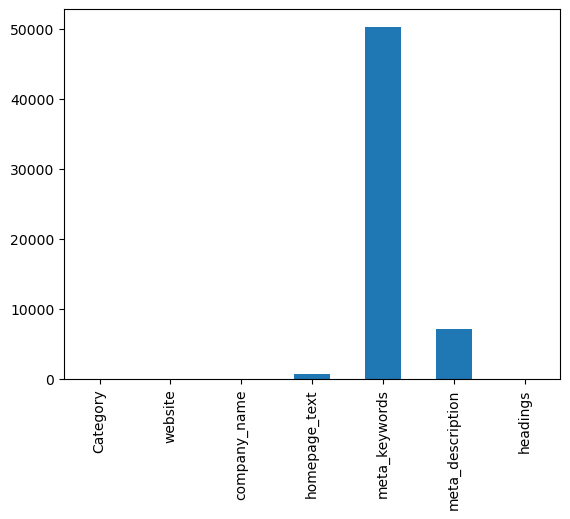

In [15]:
#visualizing the null values per column
df.isnull().sum().plot.bar()

In [16]:
# I'll drop the meta_keywords why? because they are most likely to to be in the meta_description
df.drop(['meta_keywords'], axis=1, inplace=True)

<Axes: >

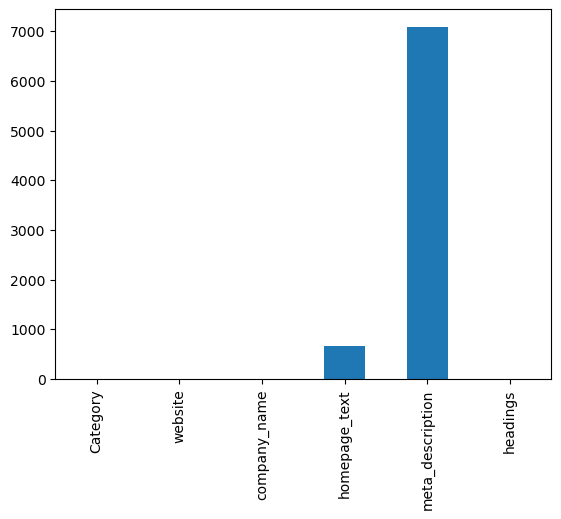

In [17]:
#visualizing the null values per column
df.isnull().sum().plot.bar()

In [18]:
# getting null value distribtuion row wise
df[['homepage_text', 'meta_description']].isnull().sum(axis=1).value_counts()

0    66570
1     7051
2      353
dtype: int64

In [19]:
# making a column which has the count of null values in these two columns : 'homepage_text','meta_description'

df['null_count'] = df[['homepage_text','meta_description']].isnull().sum(axis=1)

In [20]:
# getting the rows with more than one missing values out of the two columns mentioned above
df = df[df['null_count']<2]

df.reset_index(inplace=True, drop=True)

In [21]:
df.shape

(73621, 7)

<Axes: >

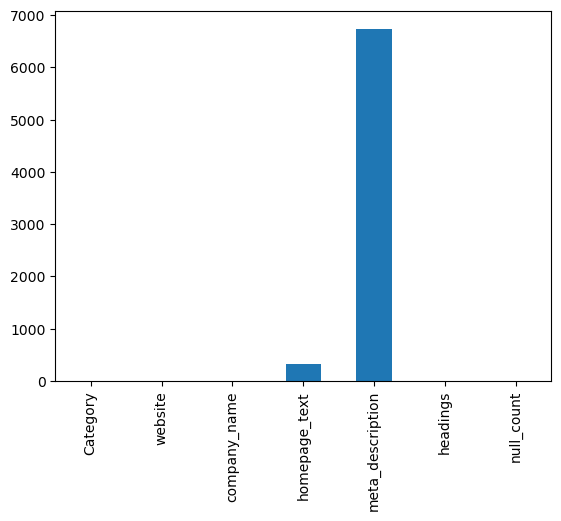

In [22]:
#visualizing the null values per column
df.isnull().sum().plot.bar()

In [23]:
df.columns

Index(['Category', 'website', 'company_name', 'homepage_text',
       'meta_description', 'headings', 'null_count'],
      dtype='object')

In [24]:
# dropping the 'null_count' column
df.drop('null_count', axis=1, inplace=True)

In [25]:
# before combining the columns
# we need to replace null values with empty strings
df.fillna('', inplace=True)

<Axes: >

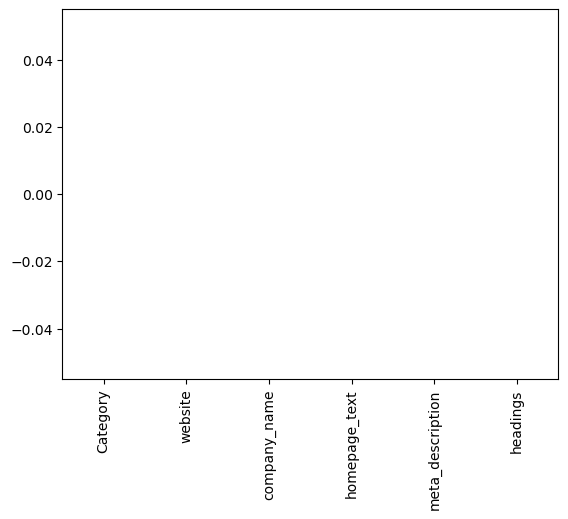

In [26]:
#visualizing the null values per column
df.isnull().sum().plot.bar()

In [27]:
# making single columns with all text information
# separated by space
df['text'] = df['homepage_text'] + ' ' + df['meta_description'] + ' ' + df['headings']+' '+df['website']+' '+df['company_name']

In [28]:
# keeping only important columns in a separate dataframe
data = df[['text','Category']]

In [29]:
data.columns

Index(['text', 'Category'], dtype='object')

In [30]:
#Looking at special characters in our data
s = 'abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ'
specials = set()

In [31]:
for text in df['text']:
    for c in text:
        if c not in s:
            specials.add(c)

In [32]:
for special in specials:
    print(special[:2000])

ר
楚
唯
디
成
🌹
␡
兼
菠

么
灭
유
定
ɖ
แ
悉
當
겁
座
蝗
〕
吾
：
о
哑

မ
發
써
እ
填
钴
别


감
诊
靶
졸
艰
있
將
垃

步
们

掉
Ţ
及

ή
界

ၾ
逃
肿
ण
奉
🤞
听
💦
Ț
选
词
私
傑
朴
ू
港
專
細
哪
佛
☂
惨
烈
ב
행
💗
套

弟

臻
🍚
終
锈
偈
󰁖
旌
辛
ல
ː
თ
ီ
ē
ῃ
区
進
ɛ

ᴄ
学
珍
红
你
깔

伊
俗
棚
◾
雷
ศ
〖
综

銀
鹕

戶
遞
ю
च
🎸

劝
ု
▢
স
頻
汇
孕
视
简
т
Ε
梓
💌
诛
ﷻ
☔
✆
搏
🌽

樹
🡥
ุ
략
🍤
჻
韧
щ

颖
裕
另
続
茭
;
刺
删
🖤
笑
ἵ
ط
ధ
白
裁

ক
園
候
屈
恒
旅
顾
技
ह

歡

赖
点
椎
影
'
🧁
断
╳

洛
校
演
趟
噂
ሻ
𝐦
帰
ை
迎
坊

层
鉴
𝐃
汲
✖
冰
東
粮
𝐊
秒
<
针

Õ
ū
尺
他
つ
粉
✕

한
延
۔
🌎
ɢ
𝐋
⁜
ூ
ハ
甲
〈
ⁱ
盛
Ｗ
残

警
ភ
扣

ೌ
凌
坚
ש

र
ཡ
烯
文

竿

伤
叶
勃
抵
高
阻
香
າ
젝
敏
縮
プ

壬
無
赏
炜

孝
리
右
卿
버
𝙀
絶
橘

🔎
✦
🔭
橋
Ｎ
ʌ
🧡
쌤
ஸ
秉
尬

缚
迫
▫
艙
係
ਨ
貴
授
気

远

炭
馅

鍋
ಅ
🔺
☣
撼
ן
杀
纳
던
ഊ
吨
邯
半
ฮ
锡
尹
住
え
铝
环
⦿
栖

🍁
掛
ǁ
ヶ
亂
🍅
咏
氧
糟
朋
帽
鼓
剧
▪
查
⁺
姬

‭
안
선
💚
冶
侨
堵
倩

赞
≑
悖
ề

猫
మ
瘫
草
♥

స
핵
ῦ
耕
青
ෙ
壤
補
ợ
𝐚
س
滞
>
滑
ซ
灯
畳
垭
И


根
器
č
億
ﻨ
兜
다
🥦
蓋
倡
団

胥
矮
抓
曙

恼
💆
渎
裸

酮
»
ง
💁
慮
ס
蹤
ማ
か
🔽
𝗺
巢
শ
居
ω
库
宪
聖
乔
呑

吳
硅
ы
率
伯
ค
哙
剰
晓
積
ペ

場
👠
販
~
𝗪
マ
傳
報
Γ

ျ
贝
〔
🧓
怨
曼
으
ī
𝐓
惜
$
辰
斥
켰

🎊

ｰ
⏰
🏿
繼
Ę

表
云
세

短
蛛
尔
并
🐮
硬
荨

示
突
搅
ূ
启


In [36]:
#Text Cleaning
import string
import unicodedata as ud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /home/richie/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
# this function removes emojis and also converts visually similar characters to normat Lating characters
def to_unicode(text):
    return ud.normalize('NFKD', text).encode('ascii','ignore').decode('utf-8','ignore')

# function to remove punctuations
def remove_punctuation(text):
    text = text.lower()
    lst = [c for c in text if c not in string.punctuation]
    return ''.join(lst)


stop_words = stopwords.words('english')
stop_words.extend(['contact','us'])

# function to remove stopwords
def remove_stopwords(text):
    lst = [word for word in text.split() if word not in stop_words]
    return ' '.join(lst)

# we also need to remove numbers from the text
def remove_number(text):
    return ''.join([i for i in text if not i.isdigit()])

stemmer = SnowballStemmer('english')

# function for stemming
def stemming(text):
    l = [stemmer.stem(word) for word in text.split()]
    return " ".join(l)

In [38]:
# function for cleaning text
def clean_text(text):
    text = to_unicode(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = remove_number(text)
    text = stemming(text)
    

    return text

In [39]:
# saving the cleaned data into a new csv file
path='CleanedBusinessClassificationData.csv'
data.to_csv(path,index=False)

In [40]:
path='CleanedBusinessClassificationData.csv'
data = pd.read_csv(path)
data.fillna('', inplace=True)

In [41]:
# cleaning the text column
data['text'] = data['text'].apply(clean_text)


In [42]:
data.drop_duplicates(inplace=True)

In [43]:
# saving the cleaned data into a new csv file
path='CleanedBusinessClassificationData.csv'
data.to_csv(path,index=False)

In [44]:
data.columns

Index(['text', 'Category'], dtype='object')

In [45]:
data.head()

,text,Category
0,electrician electr contractor serv vero beach ...,Commercial Services & Supplies
1,site map en espanol elia medic home skin care ...,Healthcare
2,home garag door repair servic designadoor gara...,Commercial Services & Supplies
3,type size home practic servic patient form eye...,Healthcare
4,simpli fill form back touch arrang free oblig ...,Commercial Services & Supplies


In [46]:
data['text'].shape

(73582,)

In [47]:
# saving the cleaned data into a new csv file
path='CleanedBusinessClassificationData.csv'
data.to_csv(path,index=False)

In [48]:
#Loading
path='CleanedBusinessClassificationData.csv'
data = pd.read_csv(path)
data.fillna('', inplace=True)

In [49]:
data.head()

,text,Category
0,electrician electr contractor serv vero beach ...,Commercial Services & Supplies
1,site map en espanol elia medic home skin care ...,Healthcare
2,home garag door repair servic designadoor gara...,Commercial Services & Supplies
3,type size home practic servic patient form eye...,Healthcare
4,simpli fill form back touch arrang free oblig ...,Commercial Services & Supplies


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [52]:
df = pd.DataFrame(data)

In [53]:
df.describe()#rember to remove the repetitionss

,text,Category
count,73582,73582
unique,73582,13
top,electrician electr contractor serv vero beach ...,Professional Services
freq,1,7305


In [54]:
# creating vectorizer object
vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.02)

In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Category'], test_size=0.2, random_state=42)

In [56]:
# Vectorize text data
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [57]:
# Initialize and train the classifier
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)

MultinomialNB()

In [58]:
# Predict on the testing set
predictions = classifier.predict(X_test_vect)

In [71]:
# Evaluate accuracy
# Assuming you have y_test (true labels) and predictions (predicted labels)
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')
print("Recall:", recall)

# Print classification report for a comprehensive evaluation
print("Classification Report:")
print(classification_report(y_test, predictions))

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8242848406604607
Precision: 0.830912791480353
Recall: 0.8242848406604607
Classification Report:
                                precision    recall  f1-score   support

Commercial Services & Supplies       0.71      0.83      0.76      1260
        Consumer Discretionary       0.85      0.56      0.68       593
              Consumer Staples       0.90      0.85      0.87      1040
            Corporate Services       0.80      0.83      0.82      1452
            Energy & Utilities       0.87      0.87      0.87      1165
                    Financials       0.88      0.89      0.89      1362
                    Healthcare       0.90      0.90      0.90      1446
                   Industrials       0.82      0.73      0.78       677
        Information Technology       0.72      0.87      0.79      1332
                     Materials       0.93      0.59      0.72       510
      Media, Marketing & Sales       0.78      0.87      0.82      1202
         Professional Servi

In [73]:
# Example of testing with new text
new_text = ["photoshoot"]
new_text_vect = vectorizer.transform(new_text)  # Vectorize the new text using the same vectorizer
predicted_category = classifier.predict(new_text_vect)
print("Predicted category:", predicted_category)

Predicted category: ['Media, Marketing & Sales']


In [125]:
import pickle

# Save the classifier to a file
with open('Businessclassifier_model.pkl', 'wb') as f:
    pickle.dump(classifier, f)


In [ ]:
# Load the classifier from the file
with open('Businessclassifier_model.pkl', 'rb') as f:
    classifier = pickle.load(f)